In [1]:
import numpy as np
import pandas as pd 
import warnings

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m

from matplotlib import pyplot as plt
import math

In [2]:
data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
data=data.drop(columns=['B_DAY'])

In [3]:
data=data.query('FIELD_16 != 1 and FIELD_23 != 1')
# data.head()

In [4]:
# data.groupby(by=['FIELD_16','FIELD_23']).size().reset_index(name='freq')

In [82]:
data2=data[['L103000', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200', 
                       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 
                       'L100100', 'L190800', 'L101000', 'L190300', 'L101600','SEX','FIELD_17','FIELD_22','FIELD_24',
'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29', 'FIELD_27', 'FIELD_28', 'FIELD_25', 
                       'FIELD_32',  'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 
                       'FIELD_20', 'FIELD_15', 'FIELD_16']].dropna()

In [83]:
temppd=pd.DataFrame(data2.copy())
temppd['y']=data.L103000
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)
corval.y[:20].index

Index(['L103000', 'y', 'L103100', 'S000200', 'S000300', 'L100800', 'L101700',
       'L100700', 'SEX', 'L190400', 'L102900', 'S001200', 'L190300',
       'FIELD_33', 'L101300', 'S000501', 'S000502', 'L190000', 'L190800',
       'L101600'],
      dtype='object')

In [84]:
x=data2[['L103100', 'S000200', 'S000300', 'L100800', 'L101700',
       'L100700', 'SEX', 'L190400', 'L102900', 'S001200', 'L190300',
       'FIELD_33', 'L101300', 'S000501', 'S000502', 'L190000', 'L190800',
       'L101600']]

y=data2[['L103000']]

In [85]:
# x.S000200=np.log2(x.S000200)

for i in x.columns:
    x[i]=np.power(x[i],10)

In [86]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.StandardScaler()  #MinMaxScaler()
# x = min_max_scaler.fit_transform(x)

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=42, test_size=0.2)

In [88]:
# x.dtypes

In [89]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=50)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[3.70308437e-01 5.08795014e-04 1.35192567e-03 7.96397270e-02
 3.42387342e-01 1.58414493e-02 1.44948185e-05 2.90375804e-04
 1.60825923e-01 1.77931828e-02 6.02230857e-04 1.09708581e-03
 7.74179250e-04 5.04775178e-04 3.54639049e-04 1.35138910e-03
 5.95773406e-03 3.96314372e-04]


mean_squared_error 3990.6572552838575
root mean_squared_error 63.17164914171433
mean_absolute_error 39.41815647355018
r2_score 0.5155077287948986


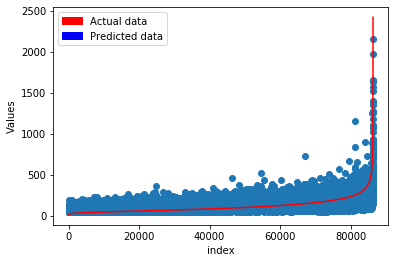

,t + 1,pred (t +1)
64626,1841.0,887.394718
73761,1878.0,1114.588068
73454,1908.0,1527.690344
28405,1956.0,1260.407865
35324,1976.0,1401.049466
15766,2013.0,1980.183546
17419,2099.0,2162.603543
15303,2288.0,1273.398756
37946,2318.0,936.479962
32102,2423.0,1652.416602


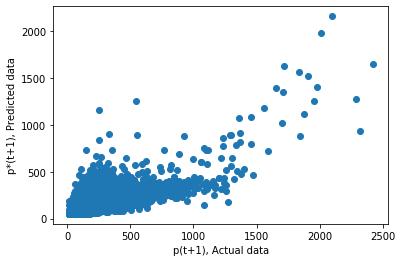

In [90]:

print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [53]:
data.columns

Index(['Unnamed: 0', 'FIELD_1', 'FIELD_2', 'COMPARE', 'AGE', 'SEX', 'FIELD_3',
       'FIELD_4', 'FIELD_5', 'FIELD_6',
       ...
       'S004423', 'S004424', 'S005200', 'S007400', 'S008501', 'S008502',
       'S008503', 'S008504', 'S010101', 'S010102'],
      dtype='object', length=405)

In [47]:
# for i in data2.columns:
#     plt.scatter(data2.L103000,data2[i])
#     plt.show()
# #     print(i)

In [46]:
# plt.hist(data.L103100,bins=50)